### 梯度下降法模拟

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plot_x = np.linspace(-1, 6, 141)
plot_y = (plot_x - 2.5) ** 2 - 1

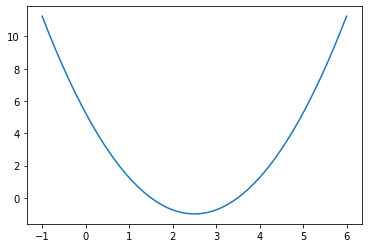

In [3]:
plt.plot(plot_x, plot_y)
plt.show()

In [4]:
def dJ(theta):
    return 2 * (theta - 2.5)

In [5]:
def J(theta):
    try:
        return (theta - 2.5) ** 2 - 1
    except:
        return float("inf")

In [6]:
eta = 0.1
epsilon = 1e-8
theta = 0.0

while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta * gradient
    
    if(abs(J(theta) - J(last_theta)) < epsilon):
        break

print(theta)
print(J(theta))

2.499891109642585
-0.99999998814289


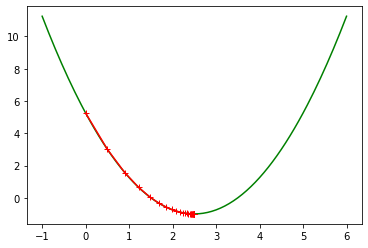

In [7]:
theta = 0.0
theta_history = [theta]
while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta * gradient
    theta_history.append(theta)
    
    if(abs(J(theta) - J(last_theta)) < epsilon):
        break
    
plt.plot(plot_x, J(plot_x), color="green")
plt.plot(np.array(theta_history), J(np.array(theta_history)), color="r", marker='+')
plt.show()

In [8]:
len(theta_history)

46

### 对代码进行封装

In [9]:
def gradient_descent(initial_theta, eta=0.1, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)
    i_iter = 0.
    while i_iter < n_iters:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)

        if(abs(J(theta) - J(last_theta)) < epsilon):
            break
        i_iter += 1
    
    print("[theta_history]的长度:", len(theta_history))
    
def plot_theta_history():
    plt.plot(plot_x, J(plot_x), color="green")
    plt.plot(np.array(theta_history), J(np.array(theta_history)), color="r", marker='+')
    plt.show()

[theta_history]的长度: 46


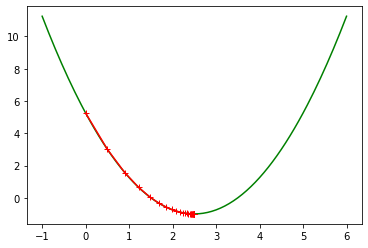

In [10]:
eta = 0.01
theta_history = []
gradient_descent(0.0)
plot_theta_history()

[theta_history]的长度: 424


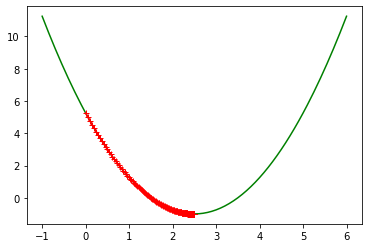

In [11]:
eta = 0.01
theta_history = []
gradient_descent(0.0, eta)
plot_theta_history()

[theta_history]的长度: 10001


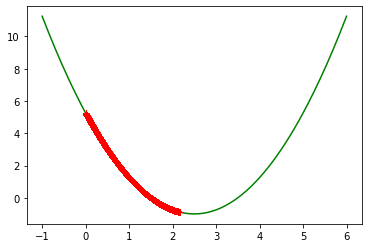

In [12]:
eta = 0.0001
theta_history = []
gradient_descent(0.0, eta)
plot_theta_history()

[theta_history]的长度: 22


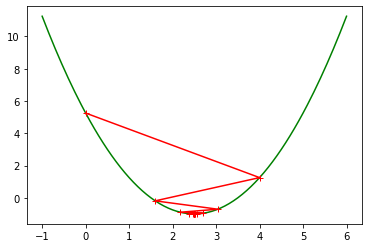

In [13]:
eta = 0.8
theta_history = []
gradient_descent(0.0, eta)
plot_theta_history()

[theta_history]的长度: 11


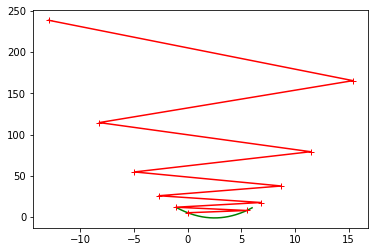

In [14]:
eta = 1.1
theta_history = []
gradient_descent(0.0, eta, n_iters=10)
plot_theta_history()

### 在线性回归中模型中使用梯度下降法

In [15]:
np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)

In [16]:
X = x.reshape(-1, 1)

In [17]:
X.shape

(100, 1)

In [18]:
y.shape

(100,)

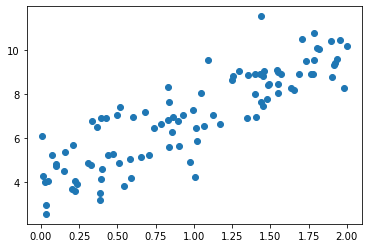

In [19]:
plt.scatter(x, y)
plt.show()

### 使用梯度下降法训练
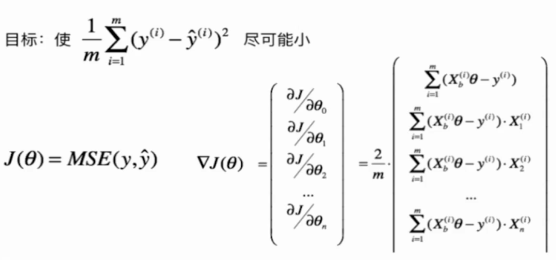

In [20]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(X_b)
    except:
        return float("inf")

In [21]:
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    return res * 2 / len(X_b)

In [22]:
def gradient_descent(X_b, y, initial_theta, eta=0.1, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta
    i_iter = 0.
    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient

        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
        i_iter += 1
    
    return theta

In [23]:
X_b = np.hstack([np.ones((len(x), 1)), x.reshape(-1, 1)])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent(X_b, y, initial_theta, eta)

In [24]:
print(theta)

[4.02145786 3.00706277]


### 测试我们封装好的线性回归算法

In [25]:
from playML.LinearRegression2 import LinearRegression2

lin_reg = LinearRegression2()
lin_reg.fit_gd(X, y)

LinearRegression2()

In [26]:
lin_reg.coef_

array([3.00706277])

In [27]:
lin_reg.interception_

4.021457858204859

### 梯度下降法向量化

In [28]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

boston = datasets.load_boston()

x = boston.data
y = boston.target

x = x[y < 50]
y = y[y < 50]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [30]:
from playML.LinearRegression import LinearRegression

In [31]:
%%time
reg = LinearRegression()
reg.fit_normal(X_train, y_train)
reg.score(X_test, y_test)

Wall time: 997 µs


0.7860341337414241

In [34]:
%%time
reg2 = LinearRegression()
reg2.fit_gd(X_train, y_train, eta=0.000001, n_iters=1e6)
reg2.score(X_test, y_test)

Wall time: 25.1 s


0.7272969133445004

In [35]:
reg2.coef_

array([-0.09344901,  0.07107802, -0.07652657,  0.18775023,  0.20901298,
        3.76377603,  0.01941523, -0.48658146,  0.12782163, -0.00939788,
        0.02014775,  0.01688821, -0.41033531])

### 使用梯度下降法前进行数据归一化

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
standarScaler = StandardScaler()
X_train_scaler = standarScaler.fit_transform(X_train)

In [39]:
%%time
reg3 = LinearRegression()
reg3.fit_gd(X_train_scaler, y_train)
X_test_scaler = standarScaler.transform(X_test)
reg3.score(X_test_scaler, y_test)

Wall time: 129 ms


0.7860644582787684

### 梯度下降的优势

In [46]:
m = 100000
n = 5000

big_X = np.random.normal(size=(m, n))

true_theta = np.random.uniform(0.0, 100.0, size=n+1)

big_y = big_X.dot(true_theta[1:]) + true_theta[0] + np.random.normal(0., 10., size=m)

In [47]:
%%time
reg1 = LinearRegression()
reg.fit_normal(big_X, big_y)

Wall time: 40.5 s


LinearRegression()

In [ ]:
%%time
reg1 = LinearRegression()
reg.fit_gd(big_X, big_y)